# 0. Imports

In [1]:
import datetime

import pandas         as pd
import numpy          as np
import seaborn        as sns
import plotly.express as px

from matplotlib       import pyplot as plt
from matplotlib       import gridspec

In [2]:
def custom_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams['font.size'] = 10

def format_numbers():
    pd.set_option('display.float_format', lambda x: '%.2f' % x) 
    
custom_settings()
format_numbers()

# 1. Data collection

In [3]:
categories = pd.read_csv('data/categories.csv', sep=';')

categories = categories.drop(columns=['picture', 'description'])

In [4]:
customers = pd.read_csv('data/customers.csv', sep=';')

customers = customers.drop(columns=['contact_name', 'contact_title', 'address', 'region', 'postal_code', 'phone', 'fax'])

customers.columns = ['customer_id', 'customer_name', 'customer_city', 'customer_country']

In [5]:
employees = pd.read_csv('data/employees.csv', sep=';')

employees['name'] = employees['last_name'] + " " + employees['first_name']

employees = employees.drop(columns=['last_name', 'first_name', 'title_of_courtesy', 'birth_date',
                                    'address','region','postal_code','home_phone','extension','photo','notes',
                                    'reports_to','photo_path'])

employees.columns = ['employee_id', 'employee_title', 'employee_hire_date', 'employee_city', 'employee_country', 'employee_name']

employees = employees[['employee_id', 'employee_name', 'employee_title', 'employee_hire_date', 'employee_city', 'employee_country']]

In [6]:
orders = pd.read_csv('data/orders.csv', sep=';')

orders = orders.drop(columns=['ship_address','ship_region','ship_postal_code'])

orders.head()

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_city,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,Reims,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Münster,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,Rio de Janeiro,Brazil
3,10251,VICTE,3,1996-07-08,1996-08-05,1996-07-15,1,41.34,Victuailles en stock,Lyon,France
4,10252,SUPRD,4,1996-07-09,1996-08-06,1996-07-11,2,51.30,Suprêmes délices,Charleroi,Belgium


In [7]:
shippers = pd.read_csv('data/shippers.csv', sep=';')

shippers = shippers.drop(columns=['phone'])

shippers.columns = ['shipper_id', 'shipper_name']

In [8]:
suppliers = pd.read_csv('data/suppliers.csv', sep=';')

suppliers = suppliers.drop(columns=['address', 'contact_name', 'contact_title', 'region',
                                    'postal_code', 'phone','fax','homepage'])

suppliers.columns = ['supplier_id', 'supplier_name', 'supplier_city', 'supplier_country' ]

In [9]:
employee_territories = pd.read_csv('data/employee_territories.csv', sep=';')

In [10]:
order_details = pd.read_csv('data/order_details.csv', sep=';')

order_details.columns = ['order_id', 'product_id', 'order_unit_price', 'quantity', 'discount']

order_details.head()

,order_id,product_id,order_unit_price,quantity,discount
0,10248,11,14.00,12,0.00
1,10248,42,9.80,10,0.00
2,10248,72,34.80,5,0.00
3,10249,14,18.60,9,0.00
4,10249,51,42.40,40,0.00


In [11]:
products = pd.read_csv('data/products.csv', sep=';')

products.columns = ['product_id', 'product_name', 'supplier_id', 'category_id', 'quantity_per_unit', 'product_unit_price',
                     'units_in_stock', 'units_on_order', 'reorder_level', 'discontinued' ]

products.head()

,product_id,product_name,supplier_id,category_id,quantity_per_unit,product_unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1


In [12]:
region = pd.read_csv('data/region.csv', sep=';')

In [13]:
territories = pd.read_csv('data/territories.csv', sep=';')

## 1.1. Data Merge

### 1.1.1. Products

In [14]:
products = products.merge(suppliers, left_on='supplier_id', right_on='supplier_id')

products = products.merge(categories, left_on='category_id', right_on='category_id')

products.head()

,product_id,product_name,supplier_id,category_id,quantity_per_unit,product_unit_price,units_in_stock,units_on_order,reorder_level,discontinued,supplier_name,supplier_city,supplier_country,category_name
0,1,Chai,8,1,10 boxes x 30 bags,18.00,39,0,10,1,"Specialty Biscuits, Ltd.",Manchester,UK,Beverages
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,1,Exotic Liquids,London,UK,Beverages
2,70,Outback Lager,7,1,24 - 355 ml bottles,15.00,15,10,30,0,"Pavlova, Ltd.",Melbourne,Australia,Beverages
3,24,Guaraná Fantástica,10,1,12 - 355 ml cans,4.50,20,0,0,1,Refrescos Americanas LTDA,Sao Paulo,Brazil,Beverages
4,75,Rhönbräu Klosterbier,12,1,24 - 0.5 l bottles,7.75,125,0,25,0,Plutzer Lebensmittelgroßmärkte AG,Frankfurt,Germany,Beverages


### 1.1.2. Employees

In [15]:
territories = territories.merge(region, left_on='region_id', right_on='region_id')

employee_territories = employee_territories.merge(territories, left_on='territory_id', right_on='territory_id')

employees = employees.merge(employee_territories, left_on='employee_id', right_on='employee_id')

employees.head()

,employee_id,employee_name,employee_title,employee_hire_date,employee_city,employee_country,territory_id,territory_description,region_id,region_description
0,1,Davolio Nancy,Sales Representative,1992-05-01,Seattle,USA,6897,Wilton,1,Eastern
1,1,Davolio Nancy,Sales Representative,1992-05-01,Seattle,USA,19713,Neward,1,Eastern
2,2,Fuller Andrew,"Vice President, Sales",1992-08-14,Tacoma,USA,1581,Westboro,1,Eastern
3,2,Fuller Andrew,"Vice President, Sales",1992-08-14,Tacoma,USA,1730,Bedford,1,Eastern
4,2,Fuller Andrew,"Vice President, Sales",1992-08-14,Tacoma,USA,1833,Georgetow,1,Eastern


### 1.1.3. Orders Details

In [16]:
order_details = order_details.merge(products, left_on='product_id', right_on='product_id')

order_details.head()

,order_id,product_id,order_unit_price,quantity,discount,product_name,supplier_id,category_id,quantity_per_unit,product_unit_price,units_in_stock,units_on_order,reorder_level,discontinued,supplier_name,supplier_city,supplier_country,category_name
0,10248,11,14.00,12,0.00,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,Dairy Products
1,10296,11,16.80,12,0.00,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,Dairy Products
2,10327,11,16.80,50,0.20,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,Dairy Products
3,10353,11,16.80,12,0.20,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,Dairy Products
4,10365,11,16.80,24,0.00,Queso Cabrales,5,4,1 kg pkg.,21.00,22,30,30,0,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,Dairy Products


### 1.1.4. Orders

In [17]:
orders = orders.merge(customers, left_on='customer_id', right_on='customer_id')

orders = orders.merge(employees, left_on='employee_id', right_on='employee_id')

orders = orders.merge(order_details, left_on='order_id', right_on='order_id')

In [18]:
data = orders[['order_id', 'order_date', 'required_date', 'shipped_date', 'ship_via', 'freight', 'ship_name',
'ship_city', 'ship_country', 'order_unit_price', 'quantity', 'discount', 'product_id', 'product_unit_price',
'product_name', 'supplier_id', 'category_id', 'quantity_per_unit',  'units_in_stock','units_on_order',
'reorder_level', 'discontinued', 'supplier_name', 'supplier_city', 'supplier_country', 'category_name',
'customer_id', 'customer_name', 'customer_city', 'customer_country', 'employee_id', 'employee_name', 'employee_title',
'employee_hire_date', 'employee_city','employee_country', 'territory_id', 'territory_description', 'region_id',
'region_description']]

# 2. Data Description

## 2.1. Data Dimension

In [19]:
print('Number of rows: {}' .format (data.shape[0]))
print('Number of columns: {}' .format (data.shape[1]))

Number of rows: 10129
Number of columns: 40


## 2.2. Data Types

In [20]:
data.head().T

,0,1,2,3,4
order_id,10248,10248,10248,10248,10248
order_date,1996-07-04,1996-07-04,1996-07-04,1996-07-04,1996-07-04
required_date,1996-08-01,1996-08-01,1996-08-01,1996-08-01,1996-08-01
shipped_date,1996-07-16,1996-07-16,1996-07-16,1996-07-16,1996-07-16
ship_via,3,3,3,3,3
freight,32.38,32.38,32.38,32.38,32.38
ship_name,Vins et alcools Chevalier,Vins et alcools Chevalier,Vins et alcools Chevalier,Vins et alcools Chevalier,Vins et alcools Chevalier
ship_city,Reims,Reims,Reims,Reims,Reims
ship_country,France,France,France,France,France
order_unit_price,14.00,9.80,34.80,14.00,9.80


In [21]:
#data.dtypes

## 2.3. Check NA

In [22]:
#data.isna().sum()

## 2.4. Change variables types

In [23]:
data['order_date'] = pd.to_datetime(data['order_date'], format='%Y-%m-%d')
data['required_date'] = pd.to_datetime(data['required_date'], format='%Y-%m-%d')
data['shipped_date'] = pd.to_datetime(data['shipped_date'], format='%Y-%m-%d')
data['employee_hire_date'] = pd.to_datetime(data['employee_hire_date'], format='%Y-%m-%d')

# 3.0 Features Creation

In [24]:
data['have_discount'] = data[['discount']].apply (lambda x: 0 if(x['discount'] > 0) else 1, axis=1) 

In [25]:
aux = data[['order_id', 'order_unit_price', 'quantity', 'discount', 'have_discount']].copy()
aux['total'] = aux['order_unit_price'] * aux['quantity']

aux['total_order'] = aux[['total', 'discount', 'have_discount']].apply (lambda 
                                                                x: x['total'] - (x['total'] * x['discount']) 
                                                                if x['have_discount'] == 0
                                                                else x['total'], axis=1) 

aux['total_sale'] = aux[['order_id','total_order']].groupby('order_id').transform('sum')

data['total_sale'] = aux['total_sale']

In [26]:
aux = data[['customer_id', 'order_date']].copy()
aux['last_purchase'] = aux[['customer_id', 'order_date']].groupby('customer_id').transform('max')
aux['active_sale'] = aux['order_date'].max() - datetime.timedelta(days= 60)

aux['customer-active'] = aux[['active_sale', 'last_purchase']].apply (lambda x: 0 if x['active_sale'] < x['last_purchase'] else 1, axis=1)

aux.head()
data['customer_active'] = aux['customer-active']

# 4.0 Data Exploration

In [27]:
v_num = data.select_dtypes(include=['int64','float64'])
v_cat = data.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## Variáveis Numéricas

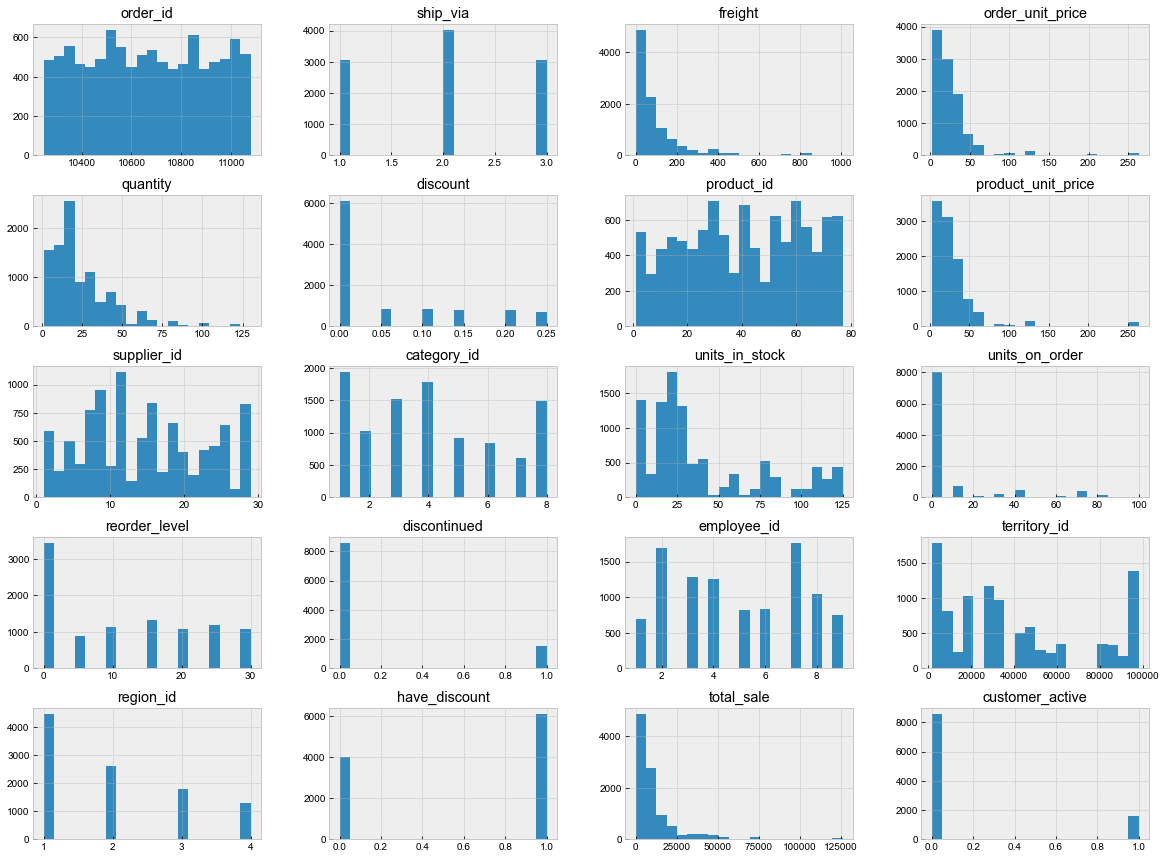

In [28]:
v_num.hist(bins=20);
sns.set_theme(style ='darkgrid')

## Variáveis Categóricas

In [29]:
print(v_cat.dtypes)
v_cat.head()

ship_name                object
ship_city                object
ship_country             object
product_name             object
quantity_per_unit        object
supplier_name            object
supplier_city            object
supplier_country         object
category_name            object
customer_id              object
customer_name            object
customer_city            object
customer_country         object
employee_name            object
employee_title           object
employee_city            object
employee_country         object
territory_description    object
region_description       object
dtype: object


,ship_name,ship_city,ship_country,product_name,quantity_per_unit,supplier_name,supplier_city,supplier_country,category_name,customer_id,customer_name,customer_city,customer_country,employee_name,employee_title,employee_city,employee_country,territory_description,region_description
0,Vins et alcools Chevalier,Reims,France,Queso Cabrales,1 kg pkg.,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,Dairy Products,VINET,Vins et alcools Chevalier,Reims,France,Buchanan Steven,Sales Manager,London,UK,Providence,Eastern
1,Vins et alcools Chevalier,Reims,France,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,Leka Trading,Singapore,Singapore,Grains/Cereals,VINET,Vins et alcools Chevalier,Reims,France,Buchanan Steven,Sales Manager,London,UK,Providence,Eastern
2,Vins et alcools Chevalier,Reims,France,Mozzarella di Giovanni,24 - 200 g pkgs.,Formaggi Fortini s.r.l.,Ravenna,Italy,Dairy Products,VINET,Vins et alcools Chevalier,Reims,France,Buchanan Steven,Sales Manager,London,UK,Providence,Eastern
3,Vins et alcools Chevalier,Reims,France,Queso Cabrales,1 kg pkg.,Cooperativa de Quesos 'Las Cabras',Oviedo,Spain,Dairy Products,VINET,Vins et alcools Chevalier,Reims,France,Buchanan Steven,Sales Manager,London,UK,Morristown,Eastern
4,Vins et alcools Chevalier,Reims,France,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,Leka Trading,Singapore,Singapore,Grains/Cereals,VINET,Vins et alcools Chevalier,Reims,France,Buchanan Steven,Sales Manager,London,UK,Morristown,Eastern


# 5.0 Hypothesis creation

### 1- O ticket médio de compras com desconto é menor do que compras sem desconto.
**Falso:** O ticket médio de compras com desconto é 20.15 % maior.

In [30]:
aux1 = data[data['have_discount']==0][['order_id','total_sale', 'have_discount']].copy()
aux1 = aux1.drop_duplicates(subset='order_id', keep='last')
y_disc = aux1[['have_discount','total_sale']].groupby('have_discount').mean().reset_index()

aux2 = data[data['have_discount']==1][['order_id','total_sale', 'have_discount']].copy()
aux2 = aux2.drop_duplicates(subset='order_id', keep='last')
n_disc = aux2[['have_discount','total_sale']].groupby('have_discount').mean().reset_index()

#aux1[['have_discount']].count()
#aux2[['have_discount']].count()

#width = 0.40
#plt.bar(y_disc['have_discount'], y_disc['total_sale_discount'], width, color='blue')
#plt.bar(n_disc['have_discount'], n_disc['total_sale_discount'], width, color='orange')

In [31]:
y_disc = aux1[['total_sale']].mean()[0]
n_disc = aux2[['total_sale']].mean()[0]

print('Ticket médio de compras com desconto aplicado: R$ {:,.2f}'.format(y_disc))
print('Ticket médio de compras sem desconto: R$ {:,.2f}'.format(n_disc))

percent = abs( ((y_disc - n_disc) / n_disc)*100 )
print('\nO ticket médio de compras com desconto é', '{:,.2f}'.format(percent),'% maior.')

Ticket médio de compras com desconto aplicado: R$ 8,692.54
Ticket médio de compras sem desconto: R$ 7,234.70

O ticket médio de compras com desconto é 20.15 % maior.


### 2- Quanto maior o desconto maior o ticket médio
**Falso:** O número .

Text(0, 0.5, 'Ticket Médio')

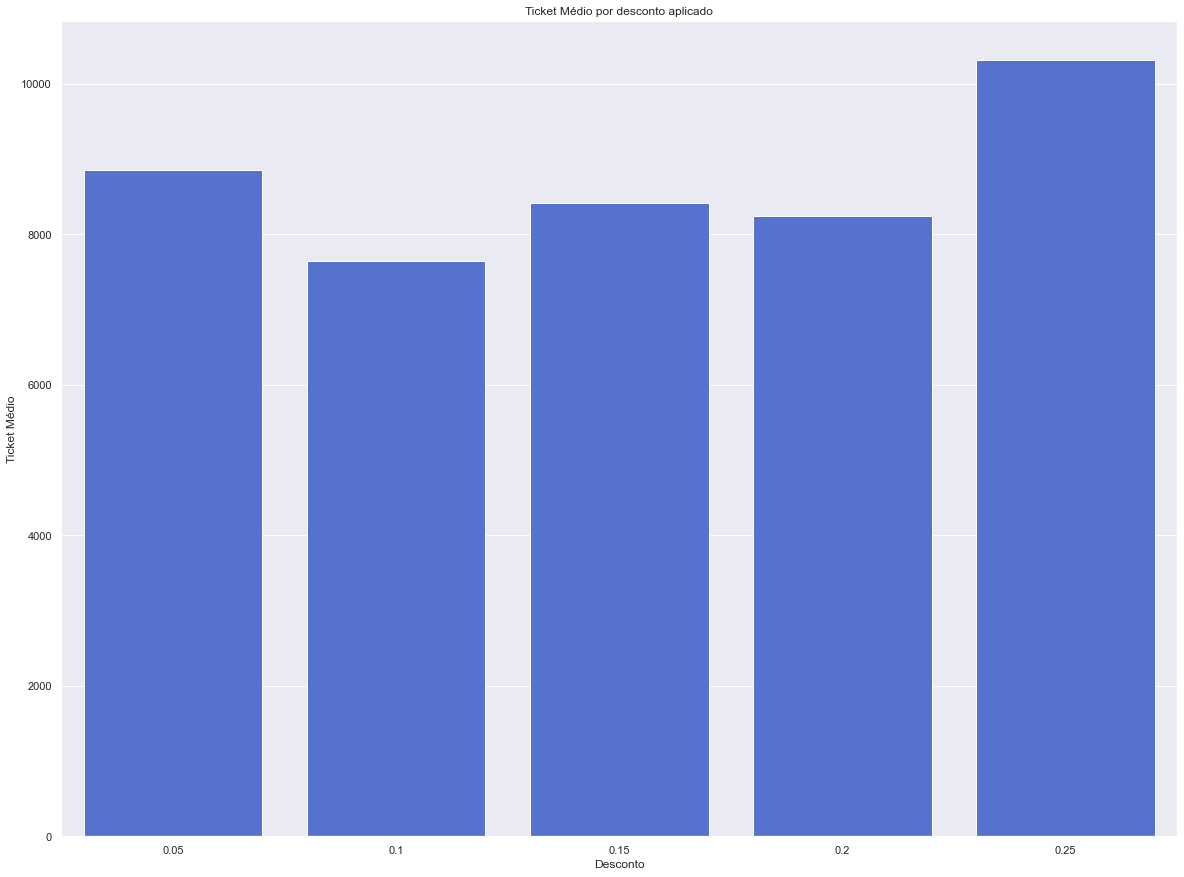

In [35]:
aux1 = data[data['have_discount']==0][['order_id','total_sale', 'discount', 'have_discount']].copy()
aux1 = aux1.drop_duplicates(subset='order_id', keep='last')

ticket = aux1[['discount', 'total_sale']].groupby('discount').mean().reset_index()

p = sns.barplot(data=ticket, x='discount', y='total_sale',color='royalblue')
p.set_title('Ticket Médio por desconto aplicado')
p.set_xlabel('Desconto')
p.set_ylabel('Ticket Médio')

In [ ]:
aux1 = data[data['have_discount']==0][['order_id','total_sale_discount', 'discount', 'have_discount']].copy()
aux1 = aux1.drop_duplicates(subset='order_id', keep='last')

ticket = aux1[['discount', 'order_id']].groupby('discount').count().reset_index()

p = sns.barplot(data=ticket, x='discount', y='order_id',color='royalblue')
p.set_title('Número de pedidos por desconto aplicado')
p.set_xlabel('Desconto')
p.set_ylabel('Número de pedidos')

In [ ]:
# quando eles deixaram de comprar

In [ ]:
aux = data[['customer_id', 'order_date']].copy()
aux['last_purchase'] = aux[['customer_id', 'order_date']].groupby('customer_id').transform('max')
aux['active_sale'] = aux['order_date'].max() - datetime.timedelta(days= 30)

aux['customer-active'] = aux[['active_sale', 'last_purchase']].apply (lambda x: 0 if x['active_sale'] > x['last_purchase'] else 1, axis=1) 

In [ ]:
aux.head()

In [ ]:
aux['order_date'].max()

In [ ]:
aux['active_sale'].max()

In [ ]:
data[data['customer-active']==1].count()

In [ ]:
data[data['customer-active']==0].count()

In [ ]:
aux1 = data[['customer_id', 'order_date']].copy()
# aux1 = aux1.drop_duplicates(subset='order_id', keep='last')

aux1['start'] = aux1[['customer_id', 'order_date']].groupby('customer_id').transform('min')
aux1['end'] = aux1[['customer_id', 'order_date']].groupby('customer_id').transform('max')

In [ ]:
aux1.head(3)

In [ ]:
aux1['order_date'].max()

In [ ]:
aux1['active_sale'] = aux1['order_date'].max() - datetime.timedelta(days= 7*8)

aux1.head()

In [ ]:
fig = px.timeline(aux1, x_start="start", x_end="end", y="customer_id")
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.show()

In [ ]:
aux = data[['customer_id', 'order_date']].copy()
aux['last_purchase'] = aux[['customer_id', 'order_date']].groupby('customer_id').transform('max')
aux['active_sale'] = aux['order_date'].max() - datetime.timedelta(days= 60)

aux['customer-active'] = aux[['active_sale', 'last_purchase']].apply (lambda x: 0 if x['active_sale'] < x['last_purchase'] else 1, axis=1)

aux.head(100)